# Analysis of the g-wave-package problem
In this setup we create a stable stratification with a constant Brunt-Vaisala frequency, using a ideal gas.
We then create a velocity field, that represents a gravity wave. 

This setup is copied from Fabian Miczek's PhD thesis __[(link)](https://d-nb.info/1034951963/34)__

In [1]:
from yt import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Compute the analytical solution

#### define constants

In [2]:
#in cgs
N_A = 6.02214129e23
k_b = 1.3806488e-16
gas_const = k_b * N_A

#### define structur parameters (check with input file if grav_const,T_0, eos_gamma,wave_angle,ymin and ymax match)

In [3]:
T_0 = 300
rho_0 = 1
grav_const = 1000
eos_gamma = 5.0/3.0
wave_angle = np.pi/3.0
ymin = -2.5e5
ymax = 5e5

# we assume a molecular weight of 1.0
hp = gas_const * T_0 / grav_const     #pressure scale height
N0 = np.sqrt(grav_const/hp * (eos_gamma - 1.0) / eos_gamma)  #brunt-vaisalla frequency
k = 10.0*2.0*np.pi/(ymax-ymin)#wavenumber

cgv = np.sqrt(3.0)/4.0 * N0/k



In [4]:
#compute expected simulation time
n = 4.0
t_end = 2.0*np.pi/N0 * n
dt = t_end/(n * 20)
print 'we want to compute for 4 oscillations until ', t_end
print 'to resolve it we want 20 timesteps per oscillation -> dt = ', dt

we want to compute for 4 oscillations until  6276.06700475
to resolve it we want 20 timesteps per oscillation -> dt =  78.4508375594


## Loading files  

In [5]:
ds = load('plt*')

In [6]:
#no idea why I need to use a sphere here, but d.box or d.all_data() just return an empty array
d0 = ds[0]
sp = d0.sphere(d0.domain_center,1e7)

yt : [INFO     ] 2018-11-26 17:59:35,991 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-11-26 17:59:35,992 Parameters: domain_dimensions         = [128 640   1]
yt : [INFO     ] 2018-11-26 17:59:35,992 Parameters: domain_left_edge          = [      0. -250000.       0.]
yt : [INFO     ] 2018-11-26 17:59:35,993 Parameters: domain_right_edge         = [  1.50000000e+05   5.00000000e+05   1.00000000e+00]


yt : [INFO     ] 2018-11-26 17:59:39,142 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:39,143 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:39,145 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:39,145 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:39,147 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



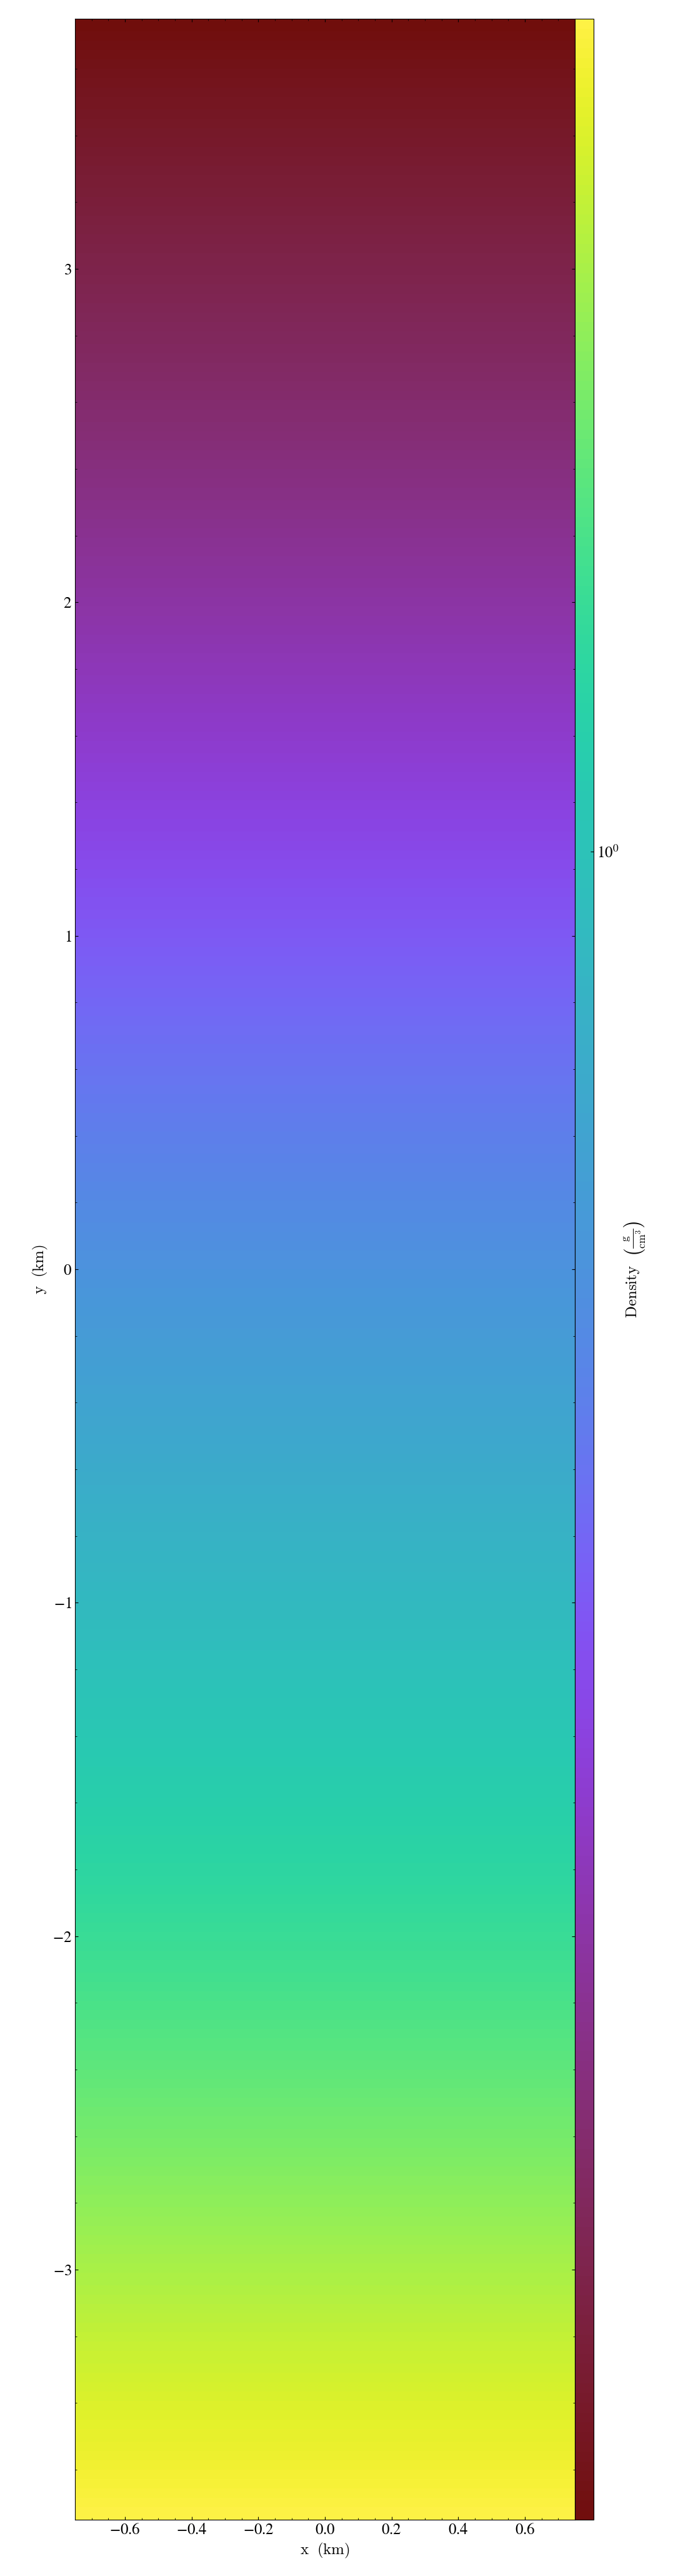

yt : [INFO     ] 2018-11-26 17:59:40,649 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:40,649 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:40,651 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:40,651 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:40,652 Making a fixed resolution buffer of (('boxlib', 'p0')) 800 by 800



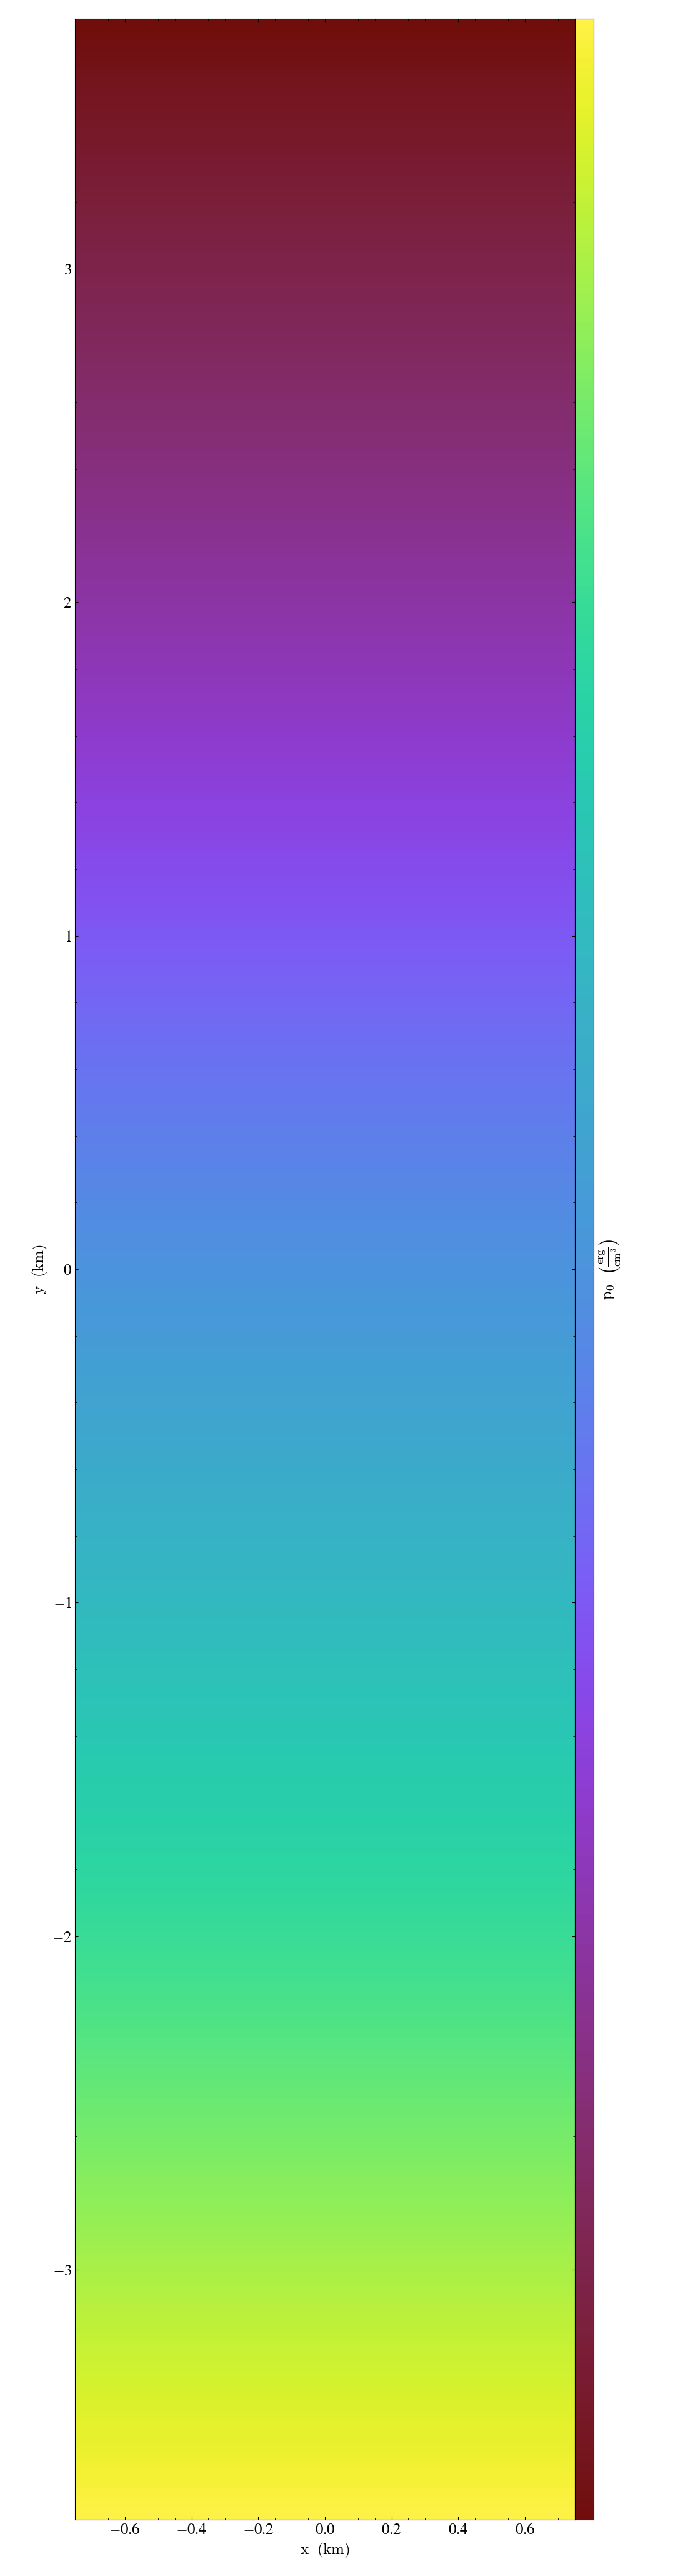

yt : [INFO     ] 2018-11-26 17:59:41,968 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:41,968 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:41,969 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:41,970 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:41,971 Making a fixed resolution buffer of (('boxlib', 'tfromh')) 800 by 800



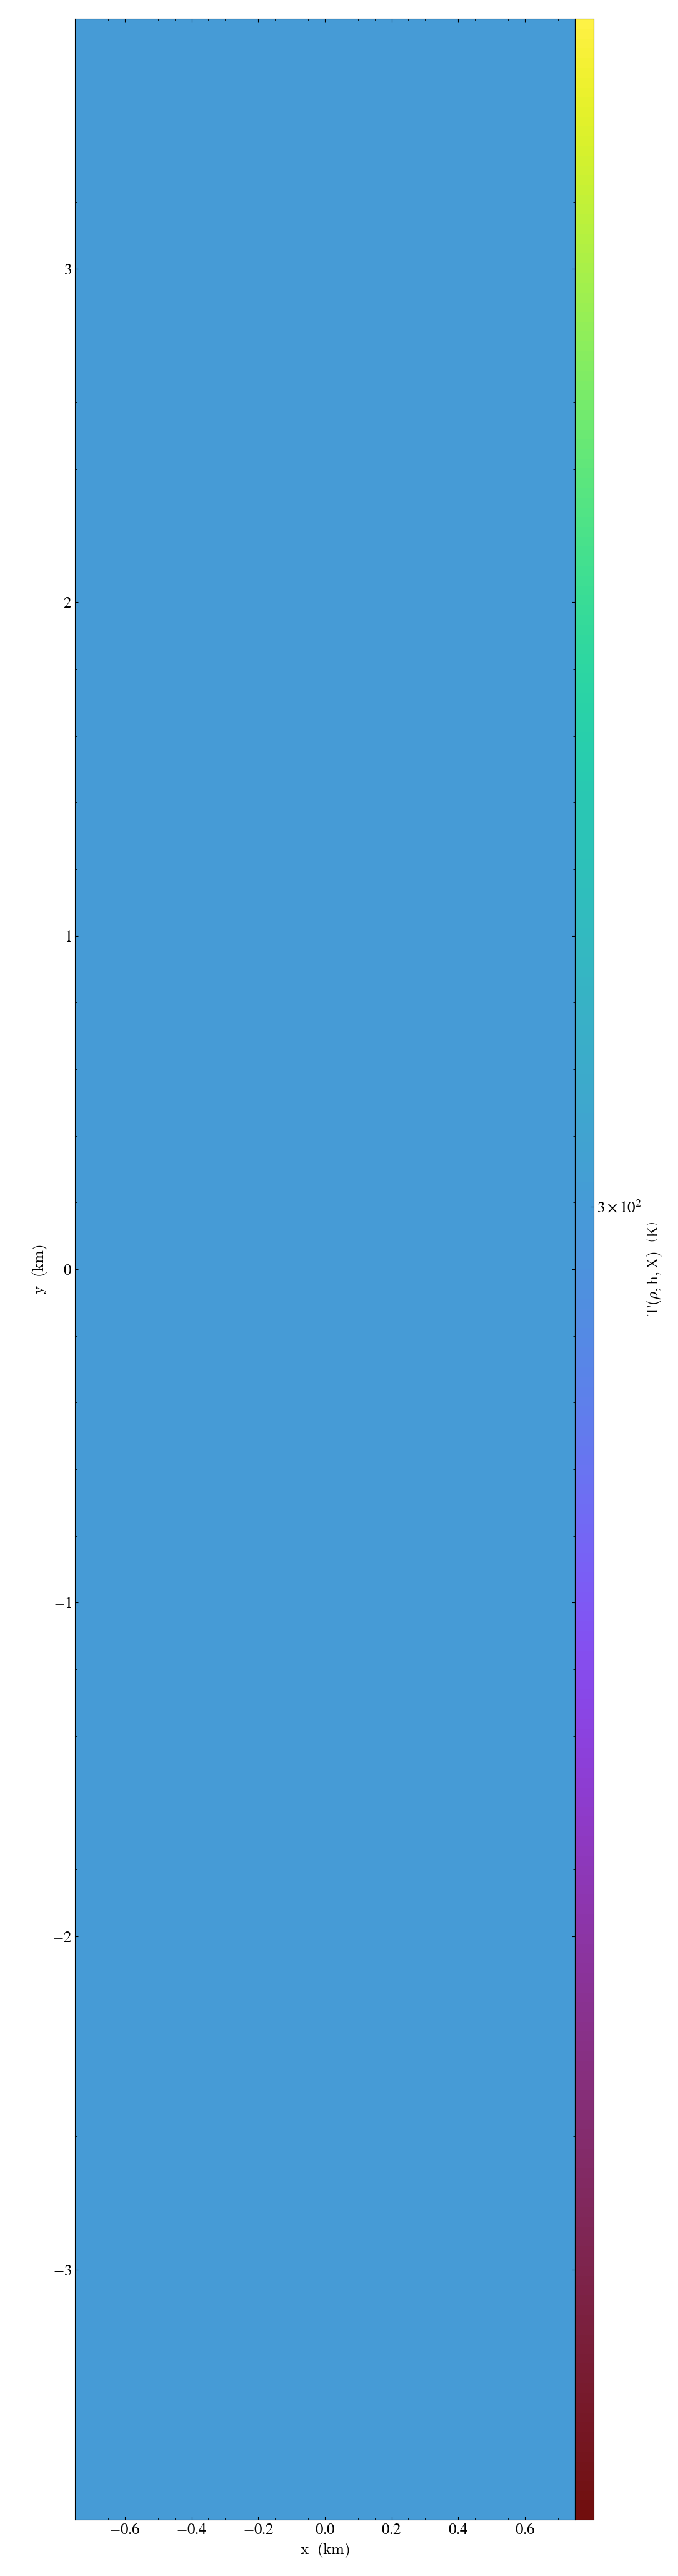

yt : [INFO     ] 2018-11-26 17:59:43,277 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:43,277 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:43,278 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:43,279 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:43,280 Making a fixed resolution buffer of (('boxlib', 'x_vel')) 800 by 800
yt : [WARNING  ] 2018-11-26 17:59:43,314 Plot image for field ('boxlib', 'x_vel') has both positive and negative values. Min = -0.346038, Max = 0.346038.
yt : [WARNING  ] 2018-11-26 17:59:43,315 Switching to symlog colorbar scaling unless linear scaling is specified later



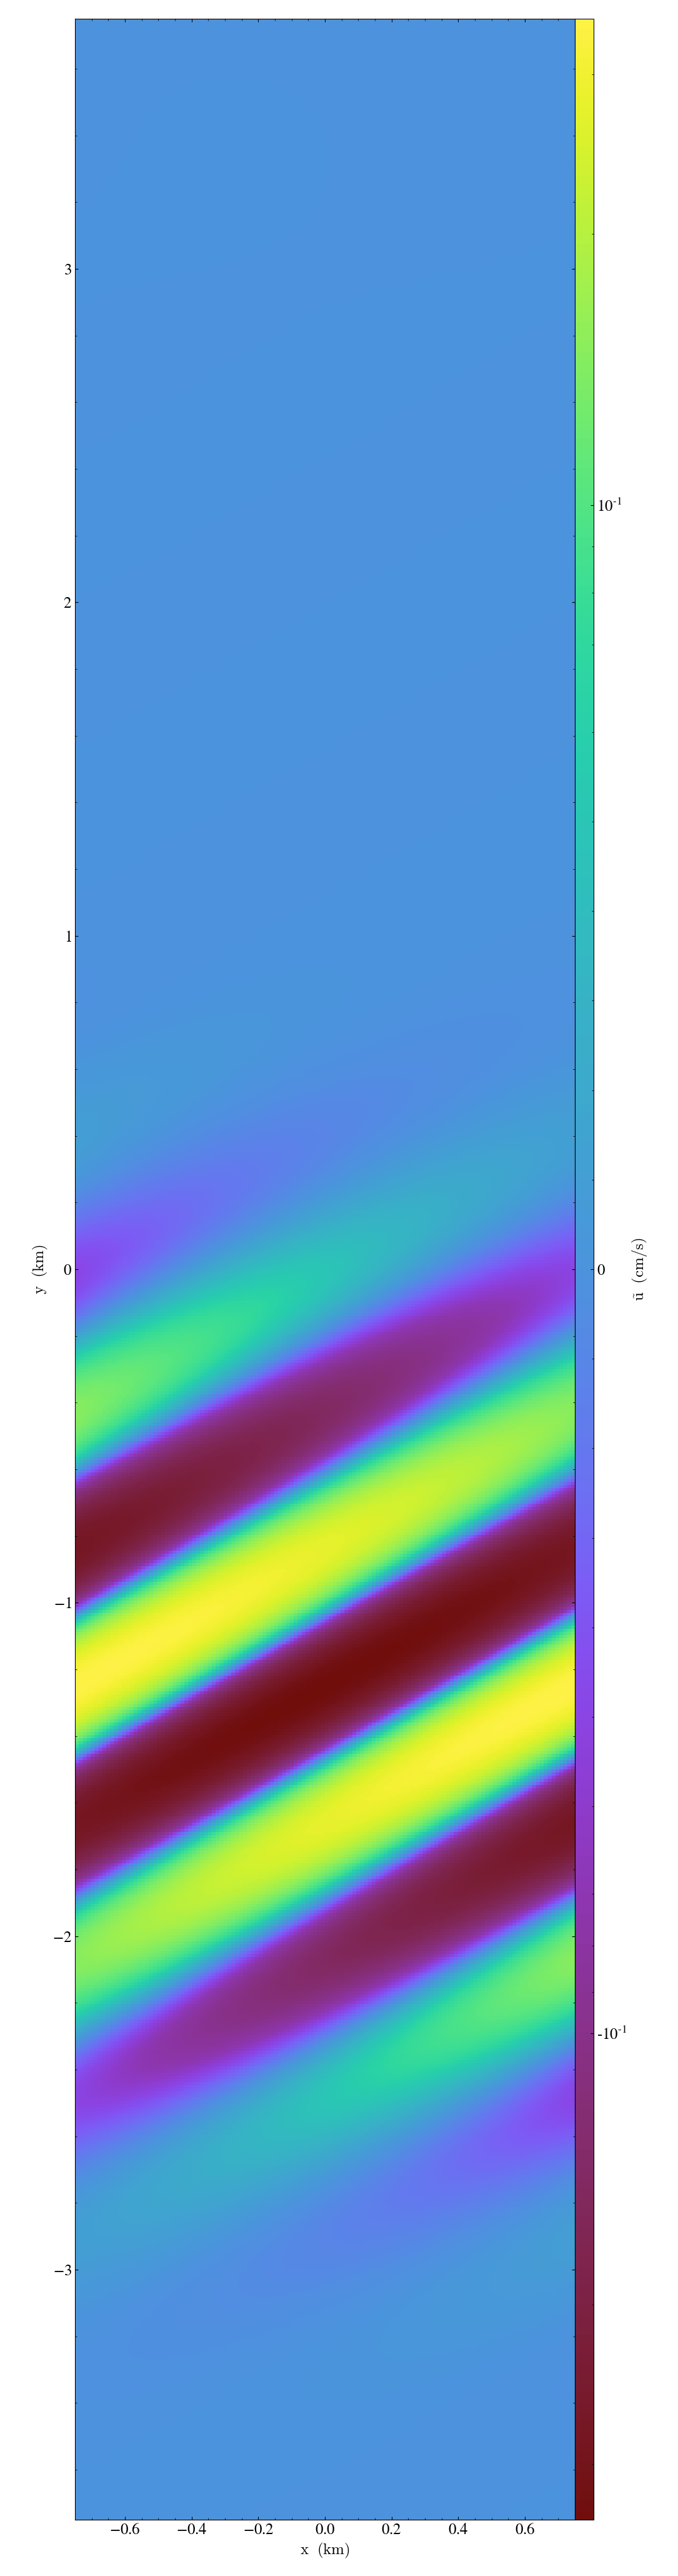

yt : [INFO     ] 2018-11-26 17:59:44,684 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:44,684 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:44,685 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:44,686 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:44,687 Making a fixed resolution buffer of (('boxlib', 'y_vel')) 800 by 800
yt : [WARNING  ] 2018-11-26 17:59:44,720 Plot image for field ('boxlib', 'y_vel') has both positive and negative values. Min = -0.206957, Max = 0.206957.
yt : [WARNING  ] 2018-11-26 17:59:44,721 Switching to symlog colorbar scaling unless linear scaling is specified later



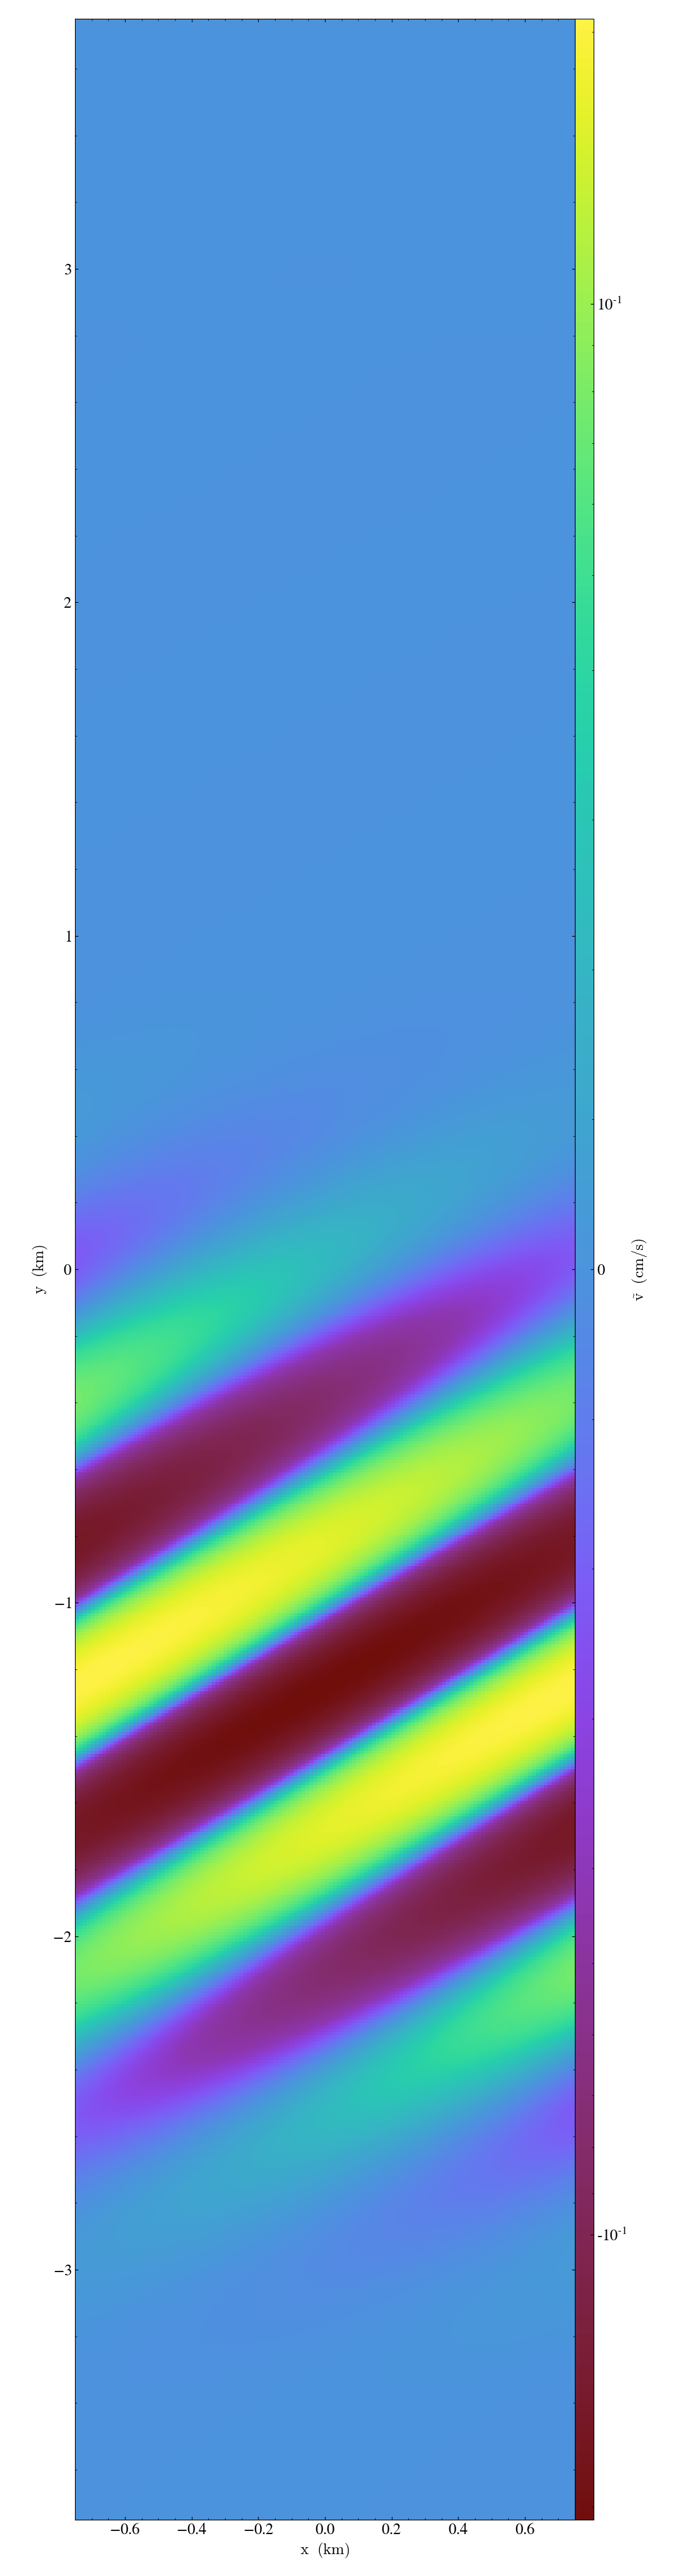

In [7]:
# show the initial setup in some slices
s = SlicePlot(d0,'z','density')
s.show()
s = SlicePlot(d0,'z','p0')
s.show()
s = SlicePlot(d0,'z','tfromh')
s.show()
s = SlicePlot(d0,'z','x_vel')
s.show()
s = SlicePlot(d0,'z','y_vel')
s.show()

### compare the initial profiles with the analytic functions:

(-2e-05, 2e-05)

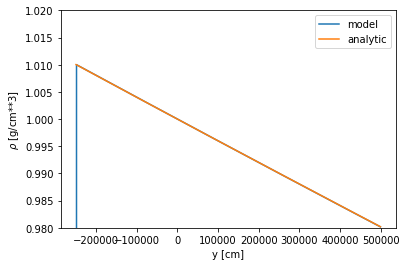

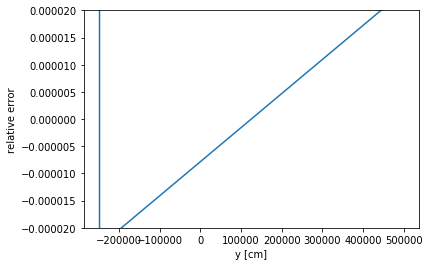

In [8]:
#density
p = create_profile(sp,('boxlib','y'),'density',logs={('boxlib','y'):False},n_bins=640)
rho = rho_0*np.exp(-p.x/hp)

plt.plot(p.x,p['density'],label='model')
plt.plot(p.x,rho,label='analytic')
plt.xlabel('y [cm]')
plt.ylabel(r'$\rho$ [g/cm**3]')
plt.ylim(0.98,1.02)
plt.legend(loc='best')

plt.figure()
plt.plot(p.x,(YTArray(rho,'g/cm**3')-p['density'])/rho)
plt.xlabel('y [cm]')
plt.ylabel(r'relative error')
plt.ylim(-2e-5,2e-5)

(-3e-05, 3e-05)

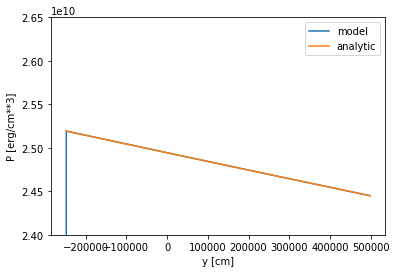

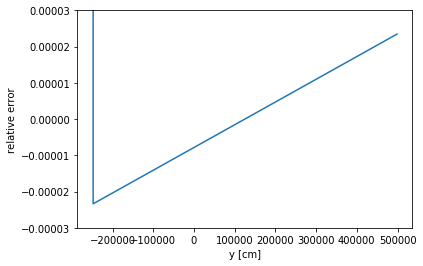

In [9]:
# pressure
p = create_profile(sp,('boxlib','y'),'p0',logs={('boxlib','y'):False},n_bins=640)
p0 = rho_0*gas_const*T_0*np.exp(-p.x/hp)

plt.figure()
plt.plot(p.x,p['p0'],label='model')
plt.plot(p.x,p0,label='analytic')
plt.xlabel('y [cm]')
plt.ylabel(r'P [erg/cm**3]')
plt.ylim(2.4e10,2.65e10)
plt.legend(loc='best')

plt.figure()
plt.plot(p.x,(YTArray(p0,'erg/cm**3')-p['p0'])/p0)
plt.xlabel('y [cm]')
plt.ylabel(r'relative error')
plt.ylim(-3e-5,3e-5)

yt : [INFO     ] 2018-11-26 17:59:46,856 Parameters: current_time              = 6276.0
yt : [INFO     ] 2018-11-26 17:59:46,857 Parameters: domain_dimensions         = [128 640   1]
yt : [INFO     ] 2018-11-26 17:59:46,858 Parameters: domain_left_edge          = [      0. -250000.       0.]
yt : [INFO     ] 2018-11-26 17:59:46,859 Parameters: domain_right_edge         = [  1.50000000e+05   5.00000000e+05   1.00000000e+00]
yt : [INFO     ] 2018-11-26 17:59:47,044 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:47,045 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:47,047 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:47,047 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:47,049 Making a fixed resolution buffer of (('boxlib', 'rhopert')) 800 by 800
yt : [WARNING  ] 2018-11-26 17:59:47,090 Plot image for field ('boxlib', 'rhopert') has both positive and negative values. Min = -0.000001, Max = 0.000001.
yt : [WAR


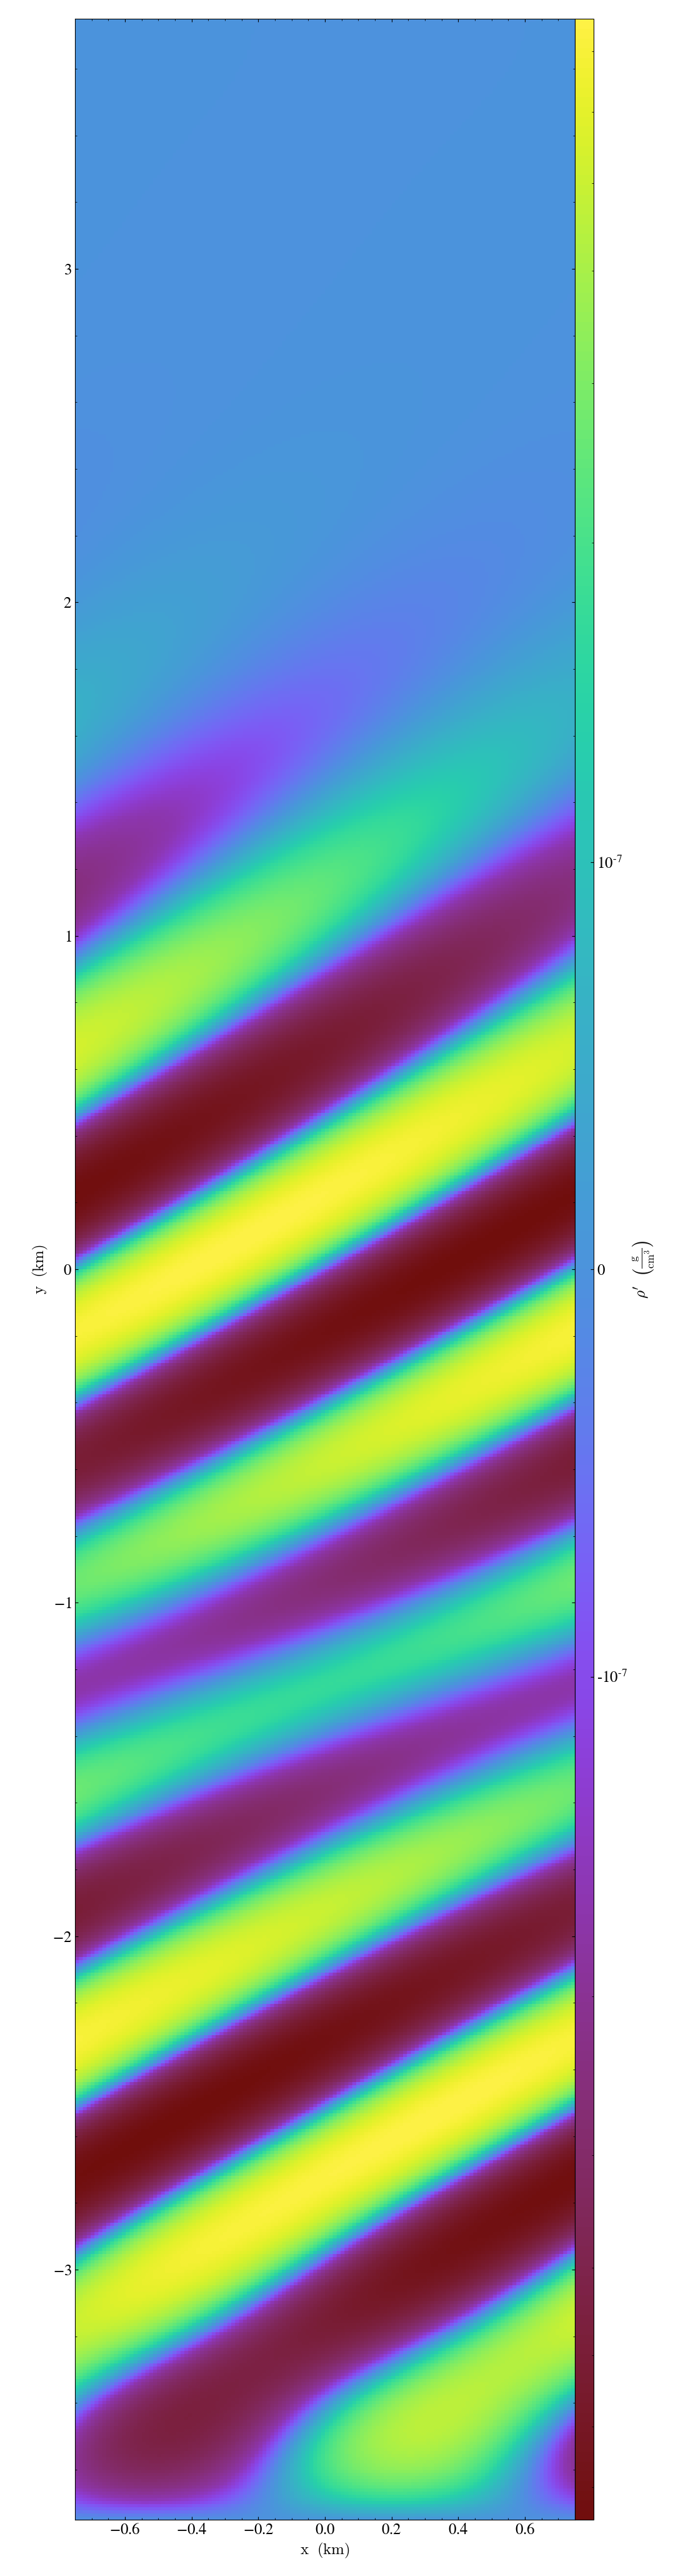

yt : [INFO     ] 2018-11-26 17:59:48,508 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:48,509 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:48,510 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:48,511 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:48,512 Making a fixed resolution buffer of (('boxlib', 'pi')) 800 by 800
yt : [WARNING  ] 2018-11-26 17:59:48,542 Plot image for field ('boxlib', 'pi') has both positive and negative values. Min = -20002227762.218147, Max = 20020520605.027058.
yt : [WARNING  ] 2018-11-26 17:59:48,543 Switching to symlog colorbar scaling unless linear scaling is specified later



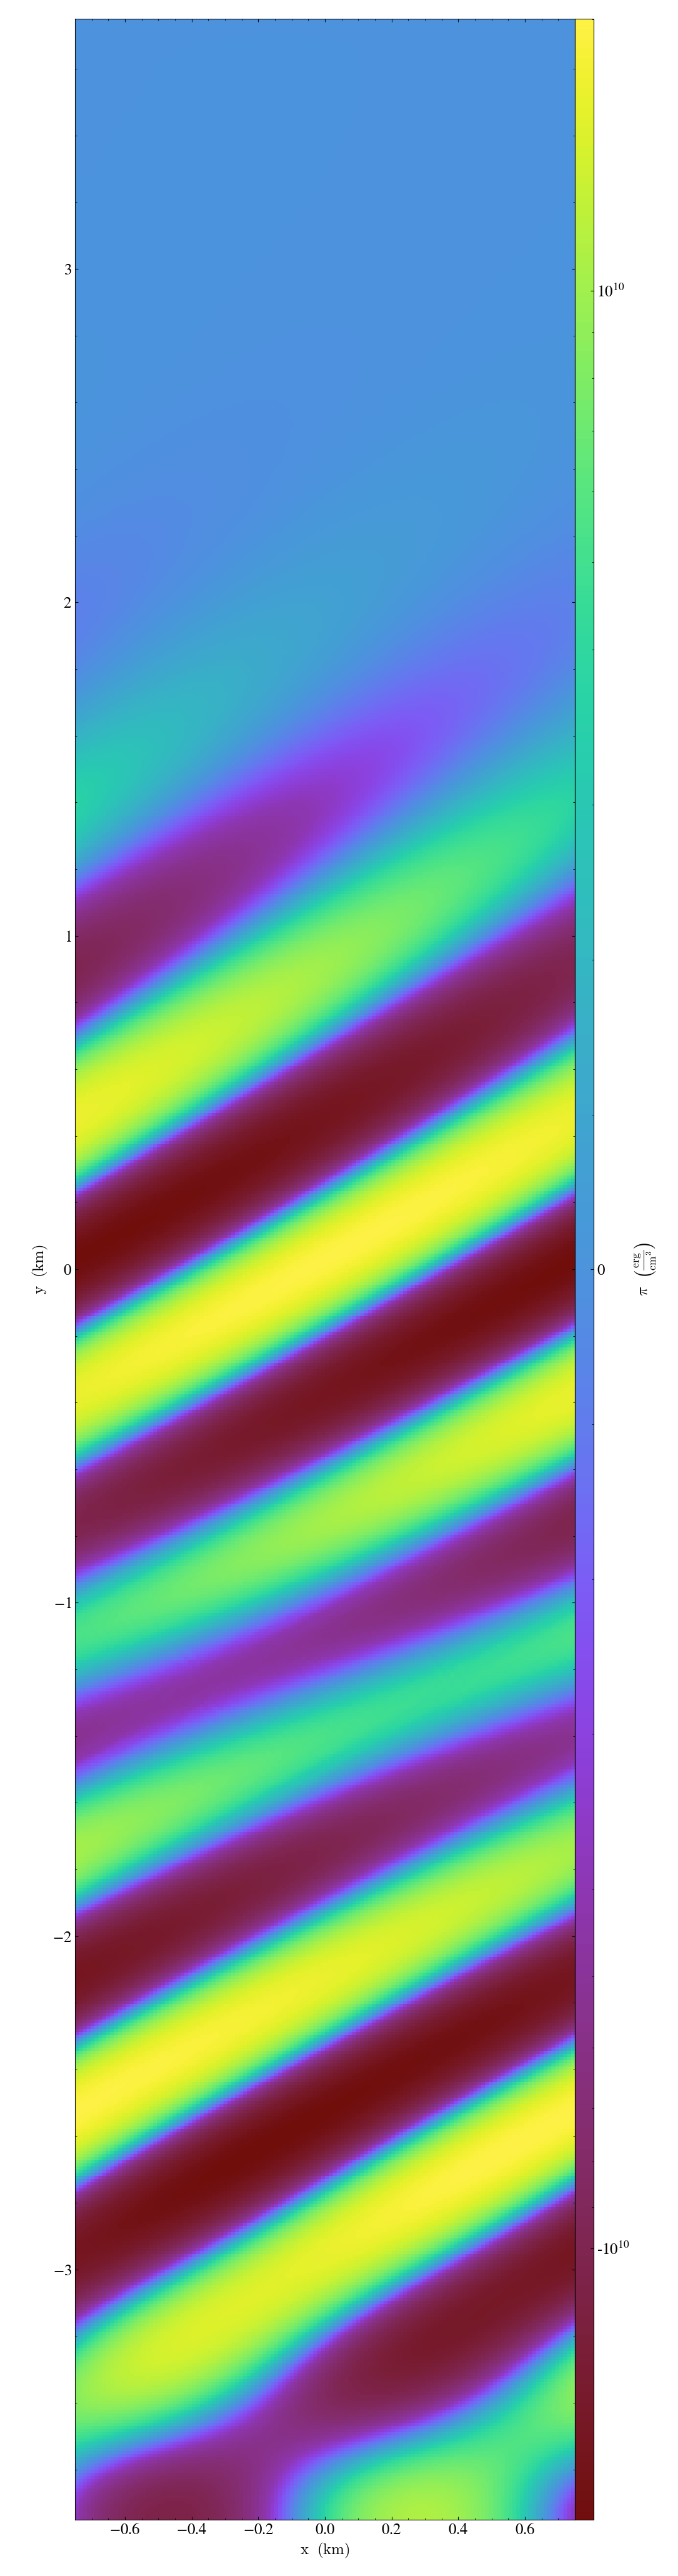

yt : [INFO     ] 2018-11-26 17:59:50,014 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:50,014 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:50,016 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:50,016 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:50,017 Making a fixed resolution buffer of (('boxlib', 'tfromh')) 800 by 800



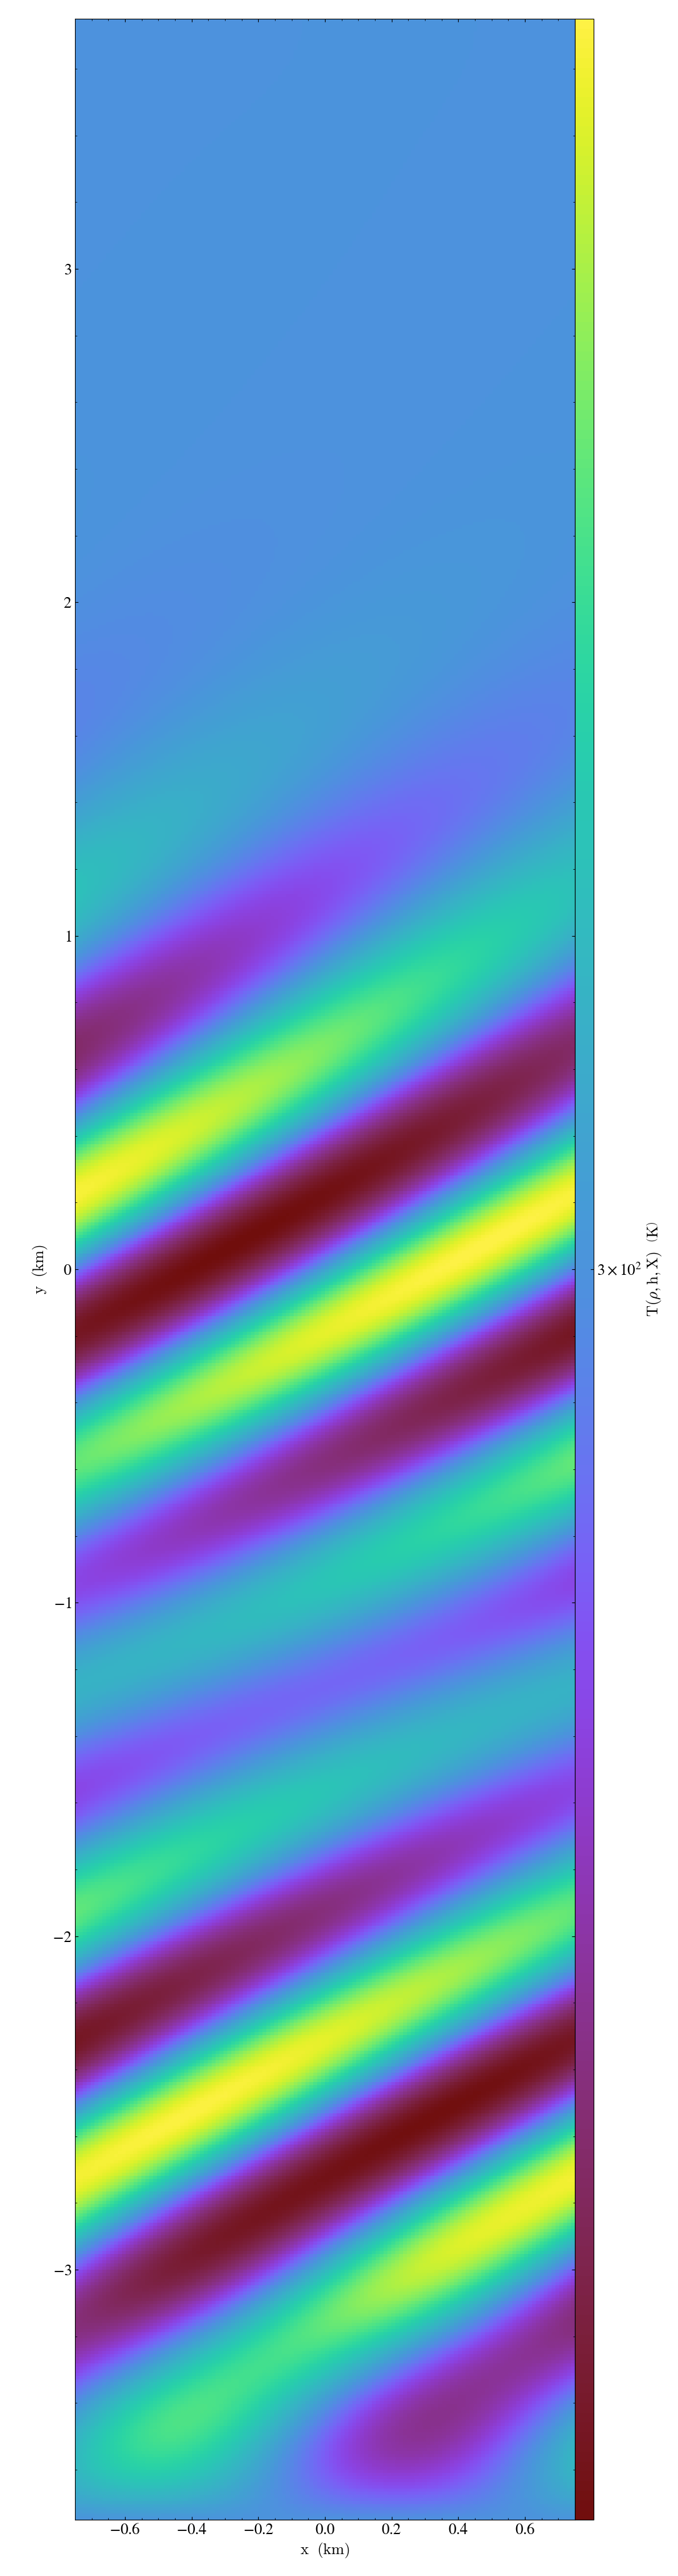

yt : [INFO     ] 2018-11-26 17:59:51,358 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:51,358 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:51,359 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:51,360 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:51,361 Making a fixed resolution buffer of (('boxlib', 'x_vel')) 800 by 800
yt : [WARNING  ] 2018-11-26 17:59:51,397 Plot image for field ('boxlib', 'x_vel') has both positive and negative values. Min = -0.163274, Max = 0.163429.
yt : [WARNING  ] 2018-11-26 17:59:51,398 Switching to symlog colorbar scaling unless linear scaling is specified later



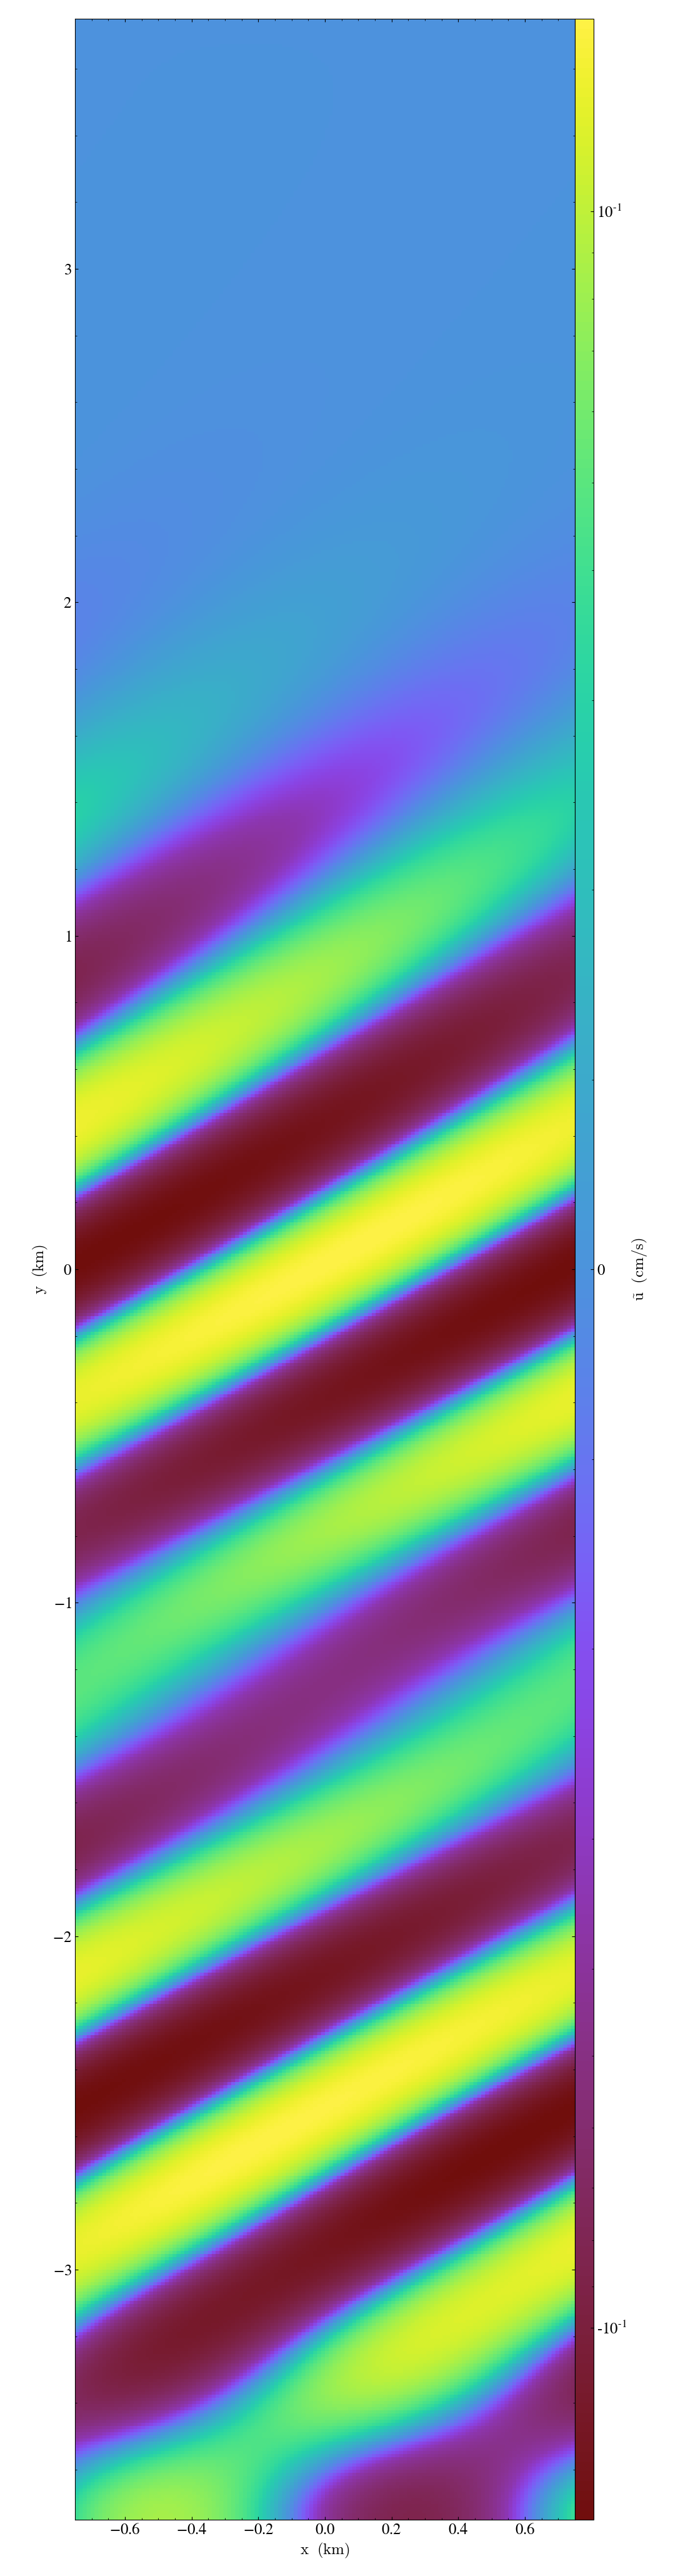

yt : [INFO     ] 2018-11-26 17:59:52,820 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:52,820 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:52,821 xlim = 0.000000 150000.000000
yt : [INFO     ] 2018-11-26 17:59:52,822 ylim = -250000.000000 500000.000000
yt : [INFO     ] 2018-11-26 17:59:52,823 Making a fixed resolution buffer of (('boxlib', 'y_vel')) 800 by 800
yt : [WARNING  ] 2018-11-26 17:59:52,855 Plot image for field ('boxlib', 'y_vel') has both positive and negative values. Min = -0.096403, Max = 0.096471.
yt : [WARNING  ] 2018-11-26 17:59:52,856 Switching to symlog colorbar scaling unless linear scaling is specified later



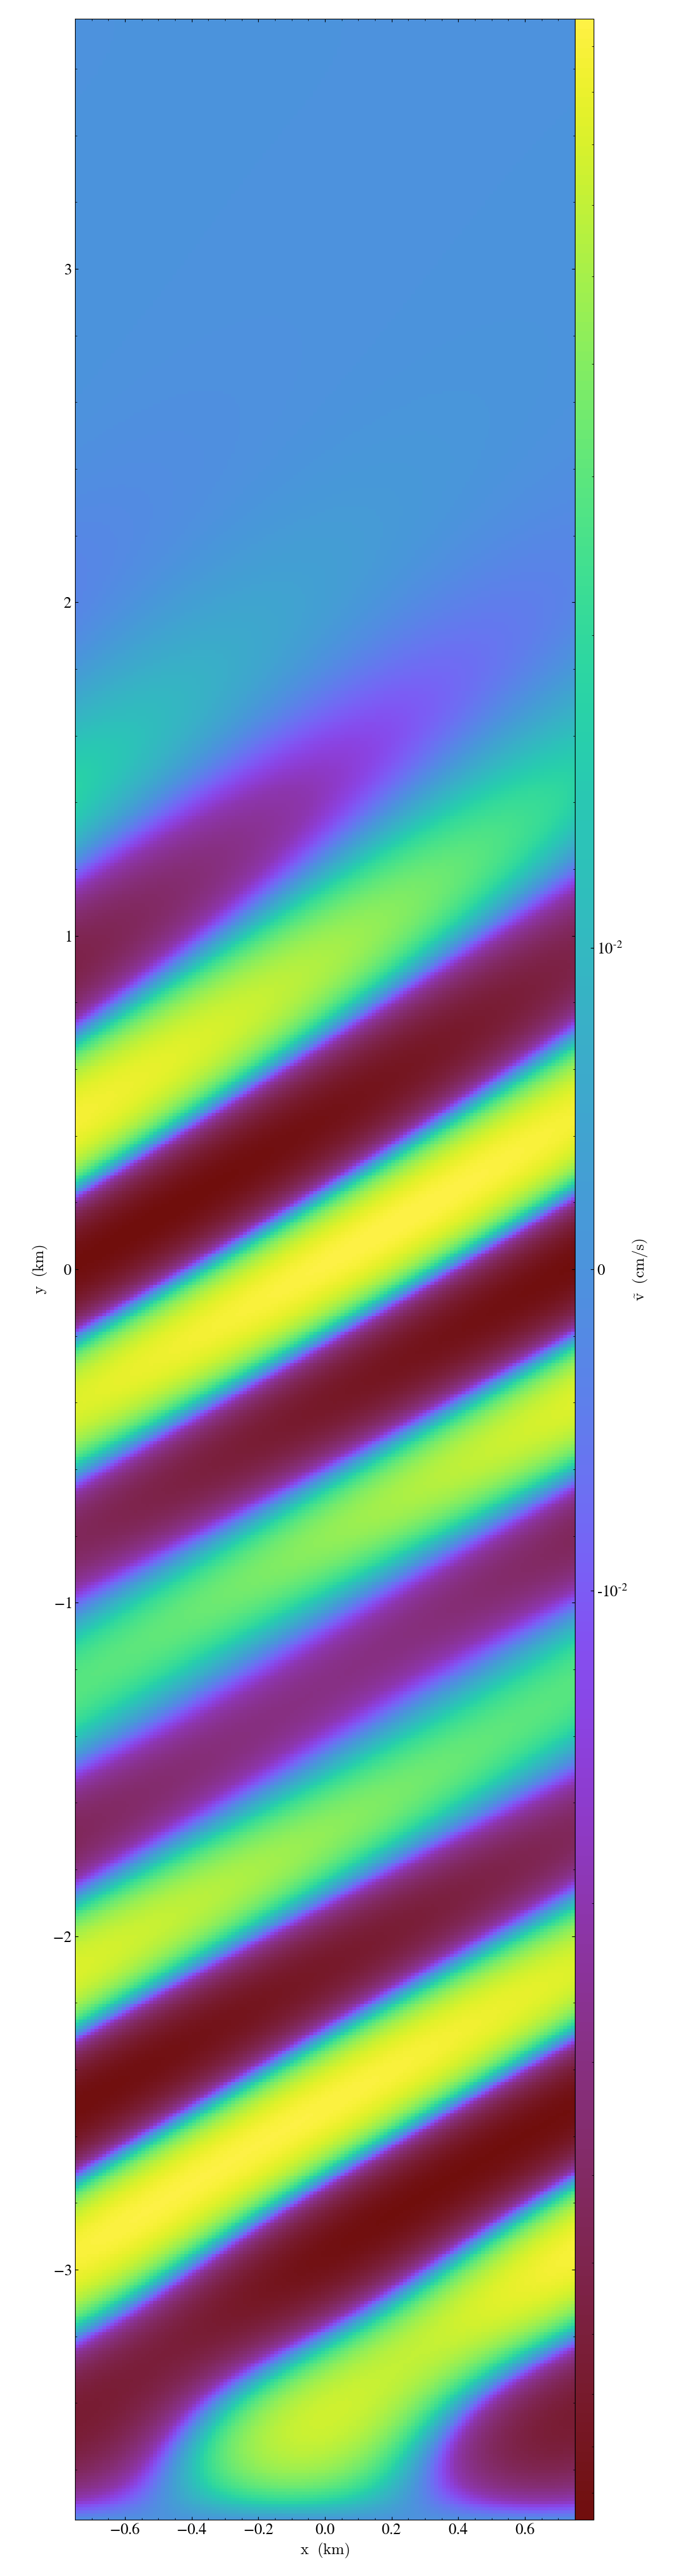

In [10]:
# show the final state in some slices instead of density and pressure, we show here density and pressure changes
de = ds[-1]
s = SlicePlot(de,'z','rhopert')
s.show()
s = SlicePlot(de,'z','pi')
s.show()
s = SlicePlot(de,'z','tfromh')
s.show()
s = SlicePlot(de,'z','x_vel')
s.show()
s = SlicePlot(de,'z','y_vel')
s.show()

### velocity evolution
the analytic solution predicts that the wavefront should move upwards with the group velocity.
The amplitude should stay the same.

In [11]:
#first create velocity profiles at several times during the simulation
profiles = []
times = []
for dd in ds[::2]:
    spd = dd.sphere(dd.domain_center,1e7)
    profiles.append(create_profile(spd,'y',['velocity_magnitude','x_vel','y_vel'],logs={'y':False},n_bins=640))
    times.append(dd.current_time)

yt : [INFO     ] 2018-11-26 17:59:54,224 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-11-26 17:59:54,225 Parameters: domain_dimensions         = [128 640   1]
yt : [INFO     ] 2018-11-26 17:59:54,226 Parameters: domain_left_edge          = [      0. -250000.       0.]
yt : [INFO     ] 2018-11-26 17:59:54,226 Parameters: domain_right_edge         = [  1.50000000e+05   5.00000000e+05   1.00000000e+00]
yt : [INFO     ] 2018-11-26 17:59:54,513 Parameters: current_time              = 1569.0
yt : [INFO     ] 2018-11-26 17:59:54,514 Parameters: domain_dimensions         = [128 640   1]
yt : [INFO     ] 2018-11-26 17:59:54,514 Parameters: domain_left_edge          = [      0. -250000.       0.]
yt : [INFO     ] 2018-11-26 17:59:54,516 Parameters: domain_right_edge         = [  1.50000000e+05   5.00000000e+05   1.00000000e+00]
yt : [INFO     ] 2018-11-26 17:59:54,724 Parameters: current_time              = 3138.0
yt : [INFO     ] 2018-11-26 17:59:54,724 Parameters: domain_d

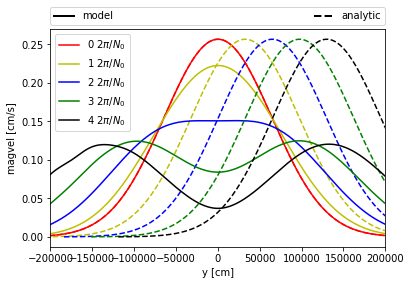

In [12]:
#now plot these profiles and also their analytic counterpart
from matplotlib.lines import Line2D
colors = ['r','y','b','g','k']

custom_lines = [
                Line2D([0], [0], linestyle='-',color='k', lw=2),
                Line2D([0], [0], linestyle='--',color='k', lw=2)
                ]



for e,i in enumerate(profiles):
    plt.plot(i.x,i['velocity_magnitude'],colors[e],label=r'%i $2\pi /N_0$'%e)
    plt.plot(i.x+YTArray(cgv,'cm/s')*times[e],profiles[0]['velocity_magnitude'],colors[e]+'--')

plt.xlabel('y [cm]')
plt.ylabel('magvel [cm/s]')
plt.xlim(-2e5,2e5)
l1 = plt.legend(loc='best')
l2 = plt.legend(custom_lines, [r'model', 'analytic'],bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0.)
plt.gca().add_artist(l1)
